In [31]:
import numpy as np
import xlrd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.linalg import svd
from tabulate import tabulate
from IPython.display import display, HTML

np.set_printoptions(suppress=True)

In [32]:
# Load xls sheet with data
filename = "data/raisins.xls"
open(filename, "rb")
doc = xlrd.open_workbook(filename).sheet_by_index(0)
# Extract attribute names and class labels
attributeNames = doc.row_values(rowx=0, start_colx=0, end_colx=7)
classLabels = doc.col_values(7, 1, 901)
classNames = sorted(set(classLabels))
classDict = dict(zip(classNames, range(len(classNames))))
# Extract vector y, convert to NumPy array
y = np.array([classDict[value] for value in classLabels])
# Preallocate memory, then extract data to matrix X
X = np.empty((900, 7))
for i in range(7):
    X[:, i] = np.array(doc.col_values(i, 1, 901)).T
# Compute values of N, M and C.
N = len(y)
M = len(attributeNames)
C = len(classNames)
# Count instances of labels
for (i, label) in enumerate(classNames):
    print("Number of instances of class '{0}': {1}".format(label, sum(y == i)))

Number of instances of class 'Besni': 450
Number of instances of class 'Kecimen': 450


In [33]:
# Compute mean, median, std, variance, range for each attribute
mean = np.mean(X, 0)
median = np.median(X, 0)
std = np.std(X, 0, ddof=1)

# Load xls sheet with data
filename = "data/raisins.xls"
open(filename, "rb")
doc = xlrd.open_workbook(filename).sheet_by_index(0)
# Extract attribute names and class labels
attributeNames = doc.row_values(rowx=0, start_colx=0, end_colx=7)
classLabels = doc.col_values(7, 1, 901)
classNames = sorted(set(classLabels))
classDict = dict(zip(classNames, range(len(classNames))))
# Extract vector y, convert to NumPy array
y = np.array([classDict[value] for value in classLabels])
# Preallocate memory, then extract data to matrix X
X = np.empty((900, 7))
for i in range(7):
    X[:, i] = np.array(doc.col_values(i, 1, 901)).T
# Compute values of N, M and C.
N = len(y)
M = len(attributeNames)
C = len(classNames)
# Count instances of labels
for (i, label) in enumerate(classNames):
    print("Number of instances of class '{0}': {1}".format(label, sum(y == i)))


Number of instances of class 'Besni': 450
Number of instances of class 'Kecimen': 450


In [41]:
# Compute mean, median, std, variance, range for each attribute
mean = np.mean(X, 0)
median = np.median(X, 0)
std = np.std(X, 0, ddof=1)

variance = np.var(X, 0, ddof=1)
rng = np.ptp(X, 0)
# export as table for latex
df = pd.DataFrame({'Attribute': attributeNames, 'Mean': mean,
'Median': median, 'Standard deviation': std, 'Variance': variance,
'Range': rng})
print(df.to_markdown())

|    | Attribute       |         Mean |       Median |   Standard deviation |        Variance |         Range |
|---:|:----------------|-------------:|-------------:|---------------------:|----------------:|--------------:|
|  0 | Area            | 87804.1      | 78902        |        39002.1       |     1.52116e+09 | 209660        |
|  1 | MajorAxisLength |   430.93     |   407.804    |          116.035     | 13464.1         |    771.662    |
|  2 | MinorAxisLength |   254.488    |   247.848    |           49.9889    |  2498.89        |    348.564    |
|  3 | Eccentricity    |     0.781542 |     0.798846 |            0.0903184 |     0.00815742  |      0.613395 |
|  4 | ConvexArea      | 91186.1      | 81651        |        40769.3       |     1.66214e+09 | 252078        |
|  5 | Extent          |     0.699508 |     0.707367 |            0.0534682 |     0.00285885  |      0.455598 |
|  6 | Perimeter       |  1165.91     |  1119.51     |          273.764     | 74946.9         |   2078.6

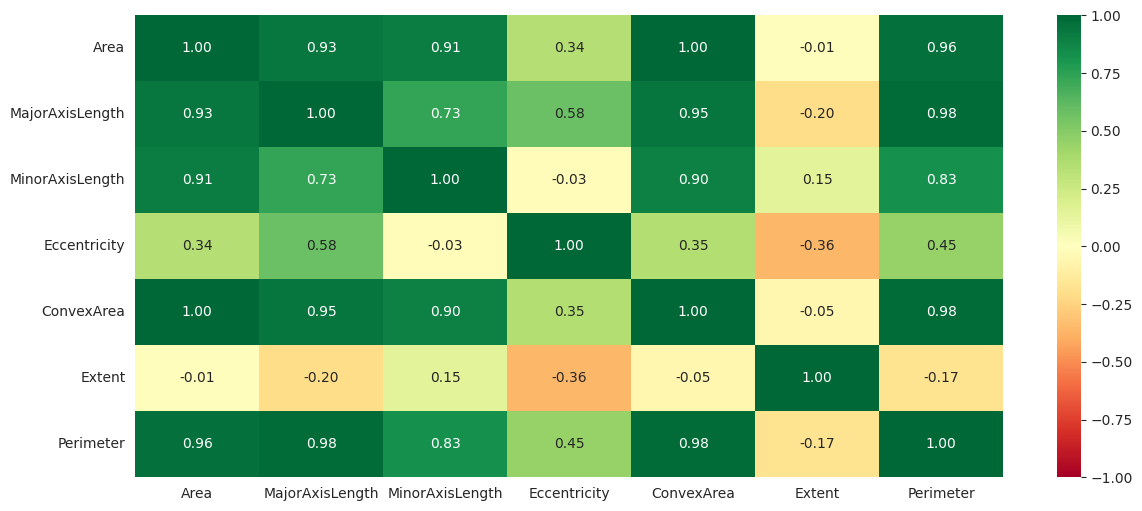

In [42]:
# make correlation matrix plot
plt.figure(figsize=(14, 6))
sns.heatmap(np.corrcoef(X, rowvar=False), annot=True, fmt=".2f",
xticklabels=attributeNames, yticklabels=attributeNames, cmap='RdYlGn',

vmin=-1, vmax=1)
plt.savefig('output/correlation_matrix.png', dpi=300)

In [43]:
print(df.to_latex(index=False, float_format='%.3f'))

\begin{tabular}{lrrrrr}
\toprule
Attribute & Mean & Median & Standard deviation & Variance & Range \\
\midrule
Area & 87804.128 & 78902.000 & 39002.111 & 1521164692.884 & 209660.000 \\
MajorAxisLength & 430.930 & 407.804 & 116.035 & 13464.149 & 771.662 \\
MinorAxisLength & 254.488 & 247.848 & 49.989 & 2498.890 & 348.564 \\
Eccentricity & 0.782 & 0.799 & 0.090 & 0.008 & 0.613 \\
ConvexArea & 91186.090 & 81651.000 & 40769.290 & 1662135017.866 & 252078.000 \\
Extent & 0.700 & 0.707 & 0.053 & 0.003 & 0.456 \\
Perimeter & 1165.907 & 1119.509 & 273.764 & 74946.900 & 2078.679 \\
\bottomrule
\end{tabular}


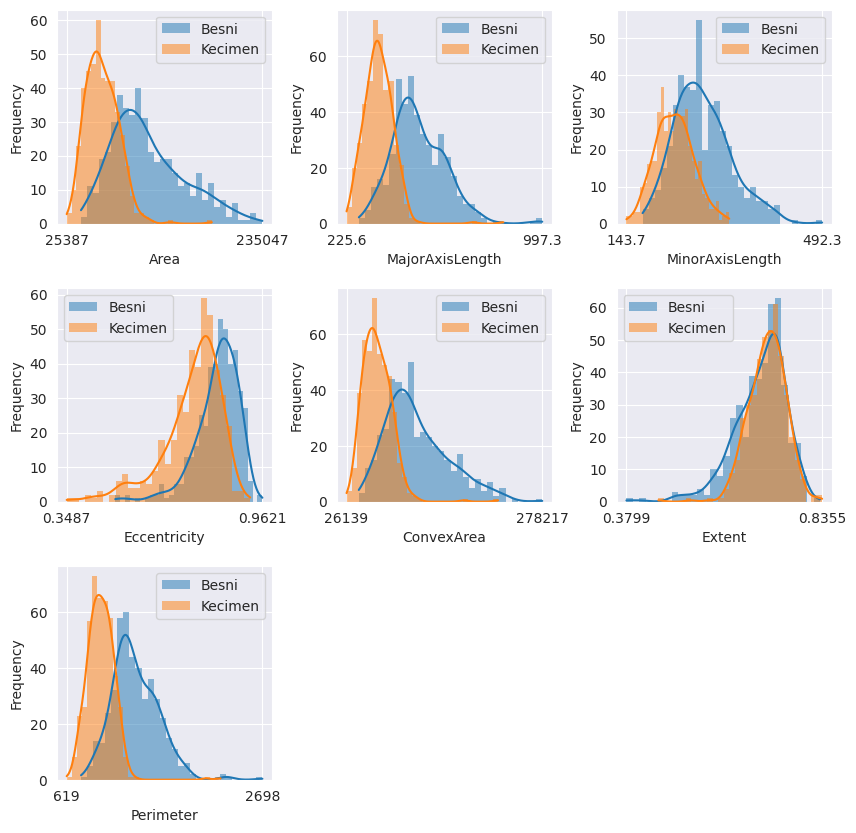

In [39]:
# Plot histograms of the attributes
fig, axs = plt.subplots(3, 3, figsize=(10, 10))
for i in range(9):
    if i < 7:
        ax = axs[i // 3, i % 3]
        for c in range(C):
            # select indices belonging to class c:
            class_mask = y == c
            sns.histplot(X[class_mask, i], kde=True, color=sns.color_palette("tab10")[c], label=classNames[c], bins=30, edgecolor='none', ax=ax)
            ax.legend()
            ax.set_xlabel(attributeNames[i])
            ax.set_ylabel("Frequency")
            ax.set_xticks([min(X[:, i]), max(X[:, i])]) # Setting only two x ticks for each subplot
    else:
        axs[i // 3, i % 3].axis('off') # Hide the last two subplots

plt.subplots_adjust(wspace=0.3) # Add horizontal padding
plt.subplots_adjust(hspace=0.3) # Add horizontal padding
plt.savefig('output/histograms.png', dpi=300)


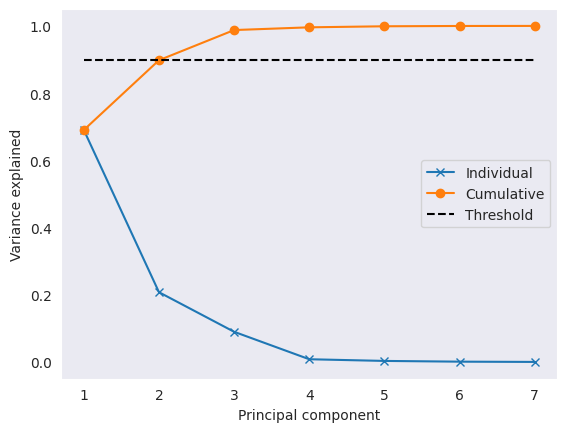

In [11]:
# Subtract mean value and normalize
Y = X - np.ones((N, 1)) * X.mean(axis=0)
Y = Y * (1 / np.std(Y, 0))
# PCA by computing SVD of Y
U, S, V = svd(Y, full_matrices=False)
# Compute variance explained by principal components
rho = (S * S) / (S * S).sum()
threshold = 0.9
# Plot variance explained
plt.figure()
plt.plot(range(1, len(rho) + 1), rho, "x-")
plt.plot(range(1, len(rho) + 1), np.cumsum(rho), "o-")
plt.plot([1, len(rho)], [threshold, threshold], "k--")
plt.xlabel("Principal component")
plt.ylabel("Variance explained")
plt.legend(["Individual", "Cumulative", "Threshold"])
plt.grid()
plt.savefig('output/pca_explained.png', dpi=300)

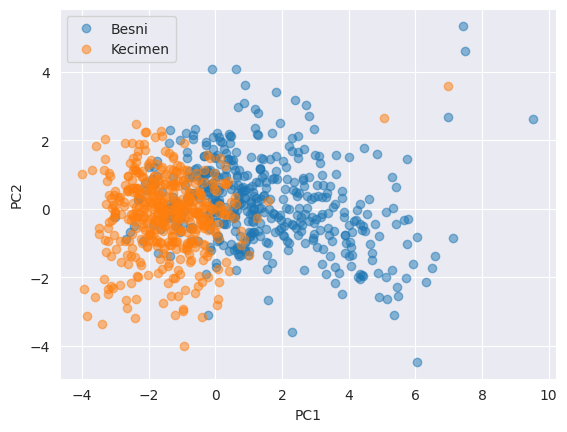

In [13]:
# Project the centered data onto principal component space
Z = Y @ V.T
# Indices of the principal components to be plotted
i = 0
j = 1
# Plot PCA of the data
f = plt.figure()
for c in range(C):
    # select indices belonging to class c:
    class_mask = y == c
    plt.plot(Z[class_mask, i], Z[class_mask, j], "o", alpha=0.5)
plt.legend(classNames)
plt.xlabel("PC{0}".format(i + 1))
plt.ylabel("PC{0}".format(j + 1))
plt.savefig('output/pca.png', dpi=300)

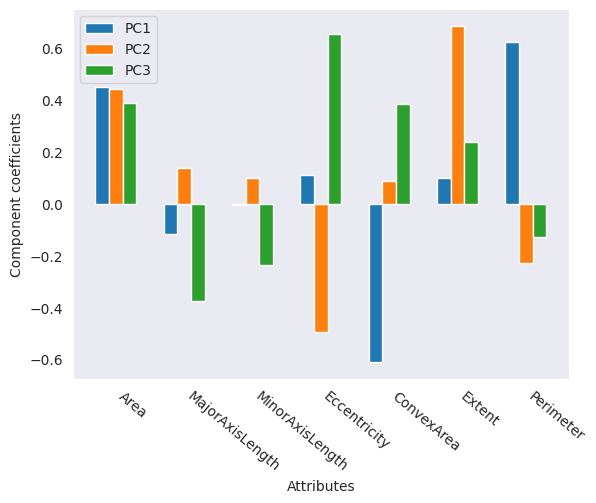

In [15]:
# Plot attribute coefficients for the first three principal components
pcs = [0, 1, 2]
legendStrs = ["PC" + str(e + 1) for e in pcs]
c = ["r", "g", "b"]
bw = 0.2
r = np.arange(1, M + 1)
for i in pcs:
    plt.bar(r + i * bw, V[:, i], width=bw)
plt.xticks(r + bw, attributeNames)
plt.xlabel("Attributes")
plt.xticks(rotation=-40, ha='left')
plt.ylabel("Component coefficients")
plt.legend(legendStrs)
plt.grid()
plt.savefig('output/pca_components.png', dpi=300)